# 1.Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas_profiling import ProfileReport as pr
import plotly.express as px
import plotly.graph_objs as go

from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

# 2. Importing library

In [2]:
df = pd.read_csv(r"C:\Users\Hp\Desktop\Intership\Logistics\SCMS_Delivery_History_Dataset.csv\SCMS_Delivery_History_Dataset.csv")
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


# 3. EDA

In [3]:
profile_report = pr(df)
profile_report

Summarize dataset:   0%|          | 0/46 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [3]:
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

#### 1.Top 15 countires with highest number of shipment


South Africa     1406
Nigeria          1194
Côte d'Ivoire    1083
Uganda            779
Vietnam           688
Zambia            683
Haiti             655
Mozambique        631
Zimbabwe          538
Tanzania          519
Rwanda            430
Congo, DRC        333
Guyana            237
Ethiopia          216
South Sudan       164
Name: Country, dtype: int64


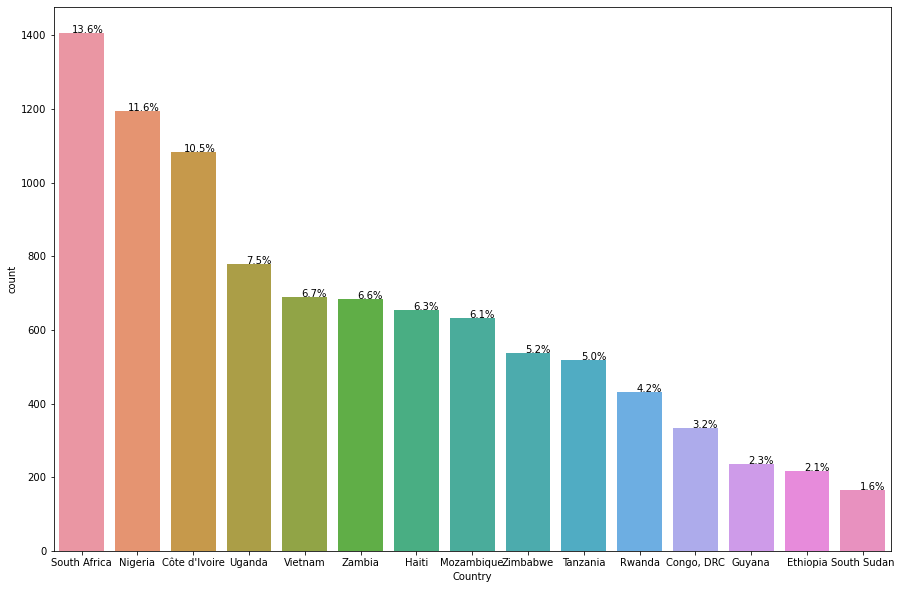

In [4]:
country_count = df.Country.value_counts().nlargest(15)
print(country_count)
plt.figure(figsize=(15,10))
ax = sns.countplot(x=df.Country,order=df.Country.value_counts().nlargest(15).index)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

##### OBSERVATION

-> 92.5% of shipment is to these 15 countries.

-> 13.6% of all shipments is to South Africa.

#### 2. Shipment mode on the basic of top 10 countries

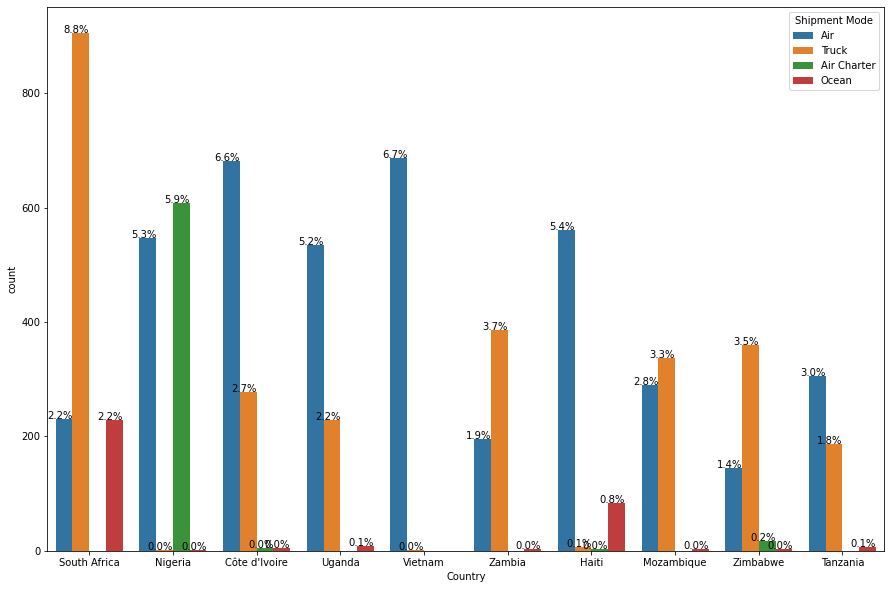

In [5]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x=df.Country,order=df.Country.value_counts().nlargest(10).index,hue=df['Shipment Mode'])
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

##### OBSERVATIONS

### 1. South Africa

-> This country has mainly 2 mode of transport Truck and Air.

-> This is the country where majority of the shipment is done through Truck.

-> And the remaining shipment is done through Air.

### 2. Nigeria

-> In this country the majority of the shipment is through Charter flights.

-> The remaining shipments are through Air.

### 3. Côte d'Ivoire

-> In this country the majority of the shipemts is through Air and Truck.

-> And a small range of shipments are done through Ocean and Charter flights.

### 4. Uganda

-> In this country the majority of the shipemts is through Air and Truck.

-> And a small range of shipments are done through Ocean.

### 5. Vietnam

-> The whole shipment is done through Air and a few shipments through Ocean.

### 6. Zambia

-> The main shipment is through Truck and comparatively less shipment is through Air 

-> No shipment is seen through Charter Flights.

### 7. Haiti

-> In this country all the four type of shipments are present. In this the most commonly used shipment Mode is through Air

-> Remaining 3 types of shipment modes are found in a small scale.

### 8. Mozambique

-> The major shipment modes are through Air and Truck.

### 9. Zimbave

-> The major shipment modes are through Truck and Air.

-> Chartered Air shipment mode is also found in this country.

### 10. Tanzania

-> The major shipment modes are through Truck and Air.

#### 3. Shipment modes

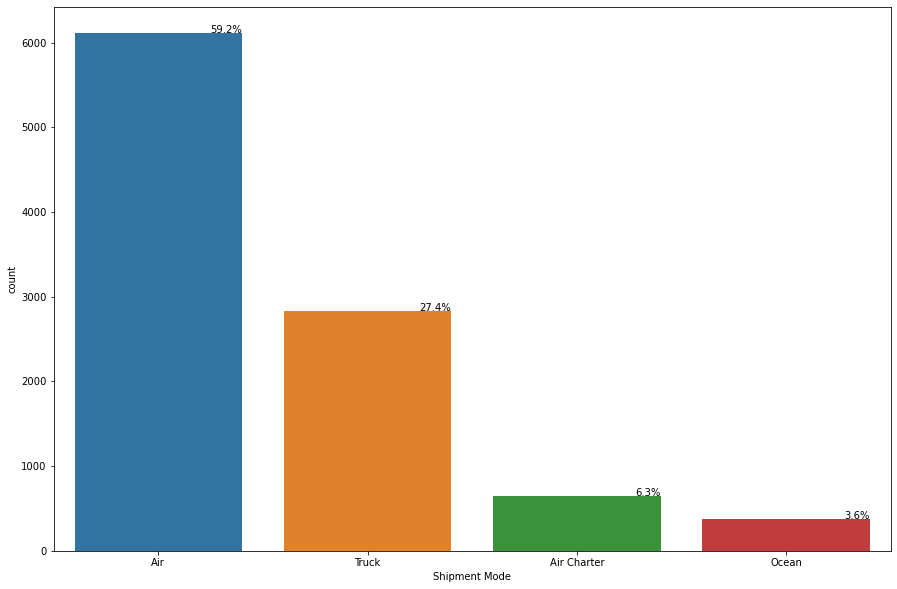

In [6]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x=df['Shipment Mode'])
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

##### OBSERVATION

-> Flights are used mainly for the shipments.

-> Truck, Air Charter and Ocean together makes the remainig Shipment Mode.

##### 4. First line designation count

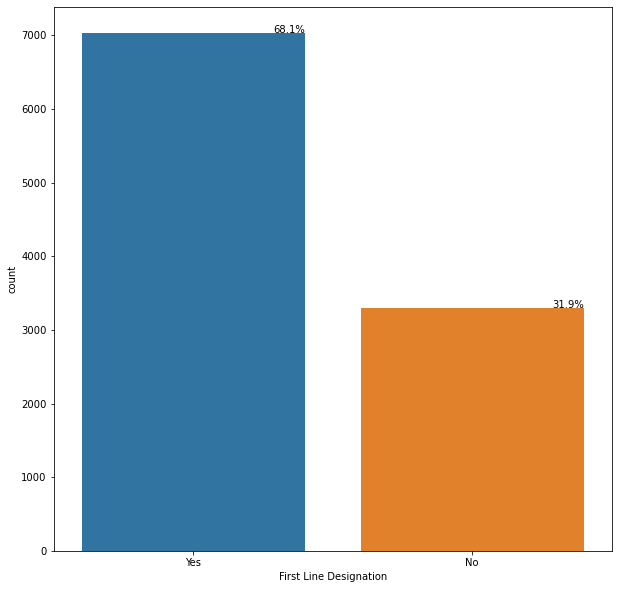

In [8]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x=df['First Line Designation'])
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

##### OBSERVATION

-> When a Doctor choose drugs to prevent the spread to disease, they initially use first line drug.

-> Here 68.1% of the drugs comes under first line designation, which are used to prevent spread of diseases.

-> The remaining drugs are for some other diseases.

##### 5.Top 10 manufacturing sites with AIR shipment mode

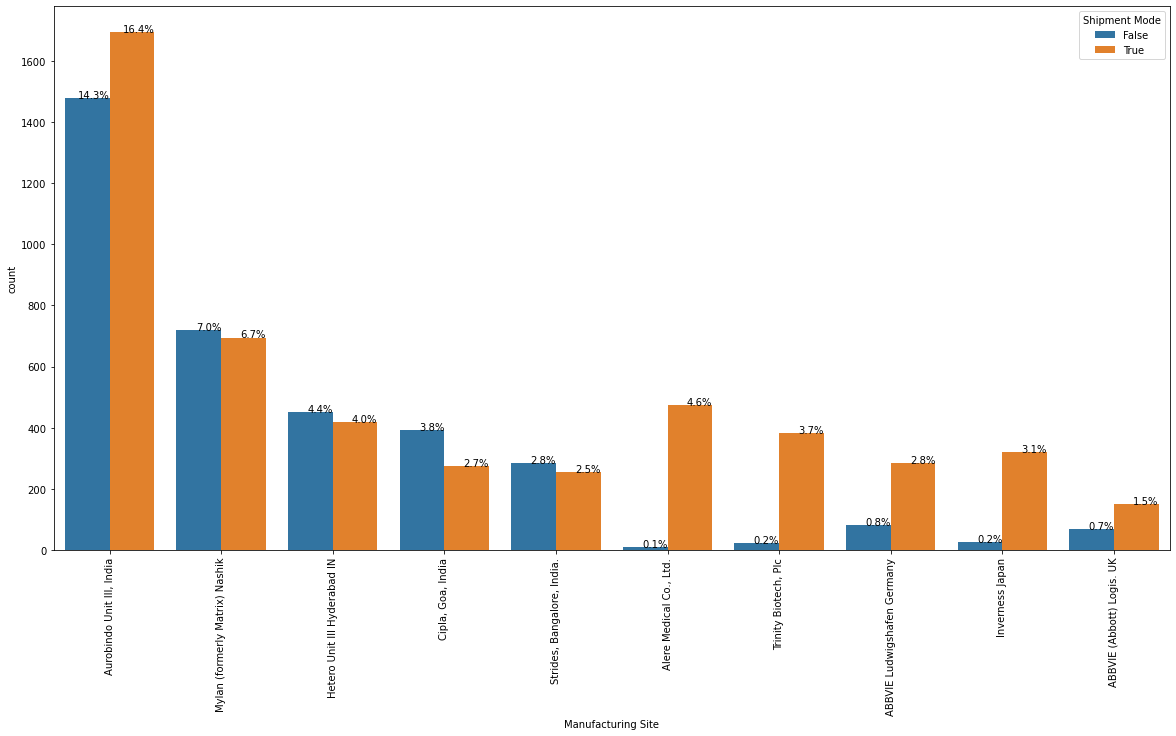

In [19]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x=df['Manufacturing Site'],order=df['Manufacturing Site'].value_counts().nlargest(10).index,hue=df['Shipment Mode']=='Air')
plt.xticks(rotation=90)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

##### 6. Top 10 manufacturing sites with Truck shipment mode

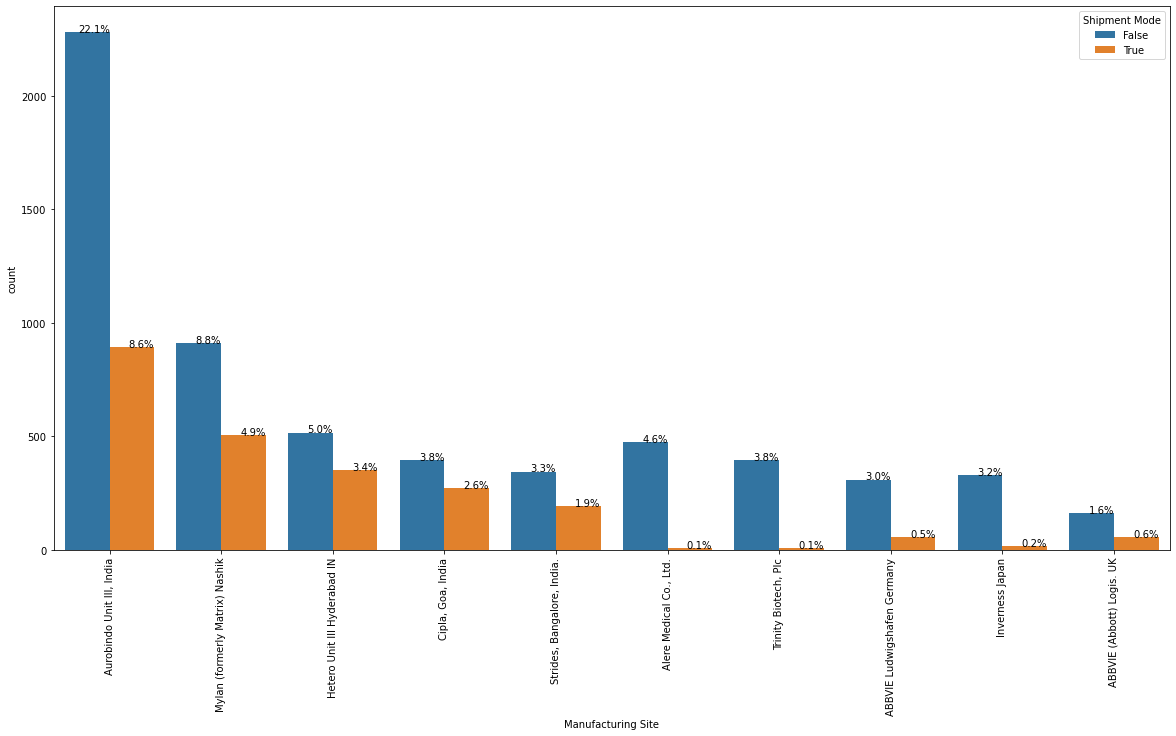

In [20]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x=df['Manufacturing Site'],order=df['Manufacturing Site'].value_counts().nlargest(10).index,hue=df['Shipment Mode']=='Truck')
plt.xticks(rotation=90)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

##### 7. Top 10 manufacturing sites with Air Charter shipment mode

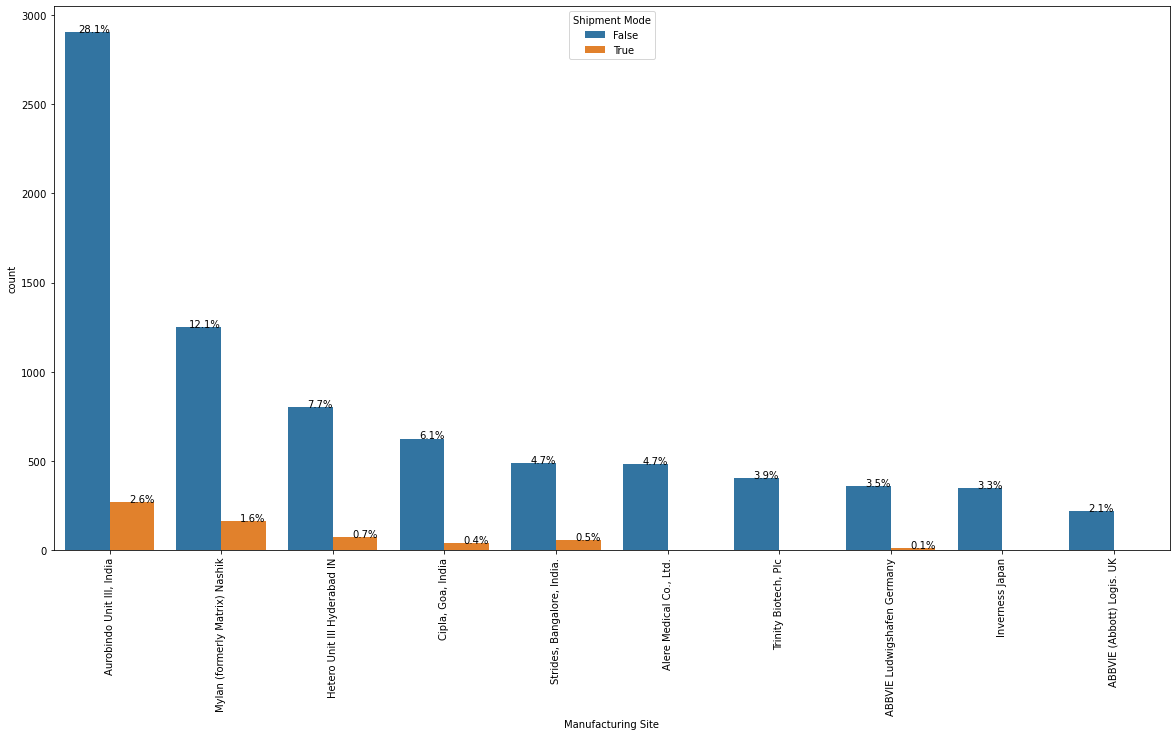

In [22]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x=df['Manufacturing Site'],order=df['Manufacturing Site'].value_counts().nlargest(10).index,hue=df['Shipment Mode']=='Air Charter')
plt.xticks(rotation=90)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

##### 8. Top 10 manufacturing sites with Ocean shipment mode

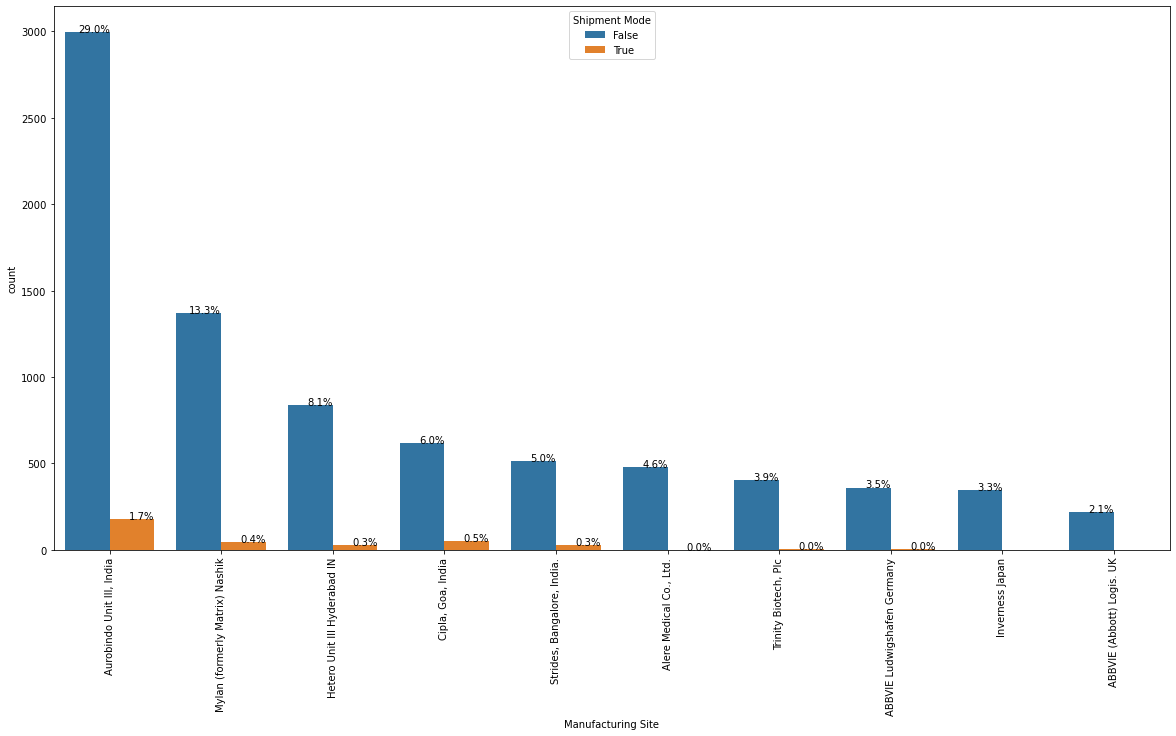

In [23]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x=df['Manufacturing Site'],order=df['Manufacturing Site'].value_counts().nlargest(10).index,hue=df['Shipment Mode']=='Ocean')
plt.xticks(rotation=90)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

##### 9. Top 10 manufacturing sites for all modes of shipment

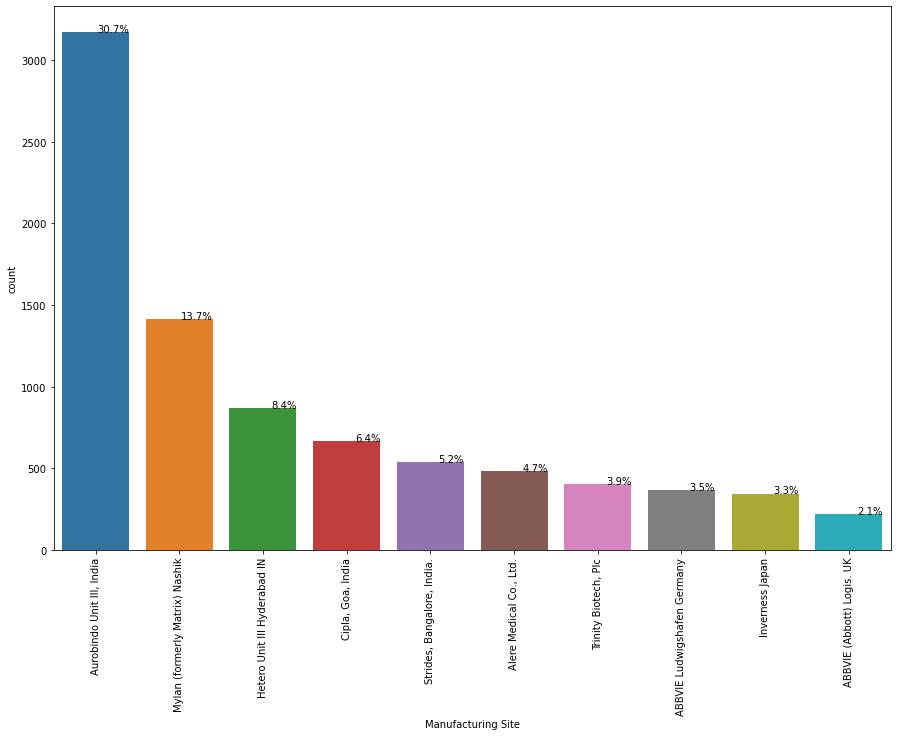

In [35]:
plt.figure(figsize=(15,10))
#top10 = df['Manufacturing Site'].value_counts().nlargest(10)
ax = sns.countplot(x=df['Manufacturing Site'],order=df['Manufacturing Site'].value_counts().nlargest(10).index)
plt.xticks(rotation=90)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

##### 10. Plot for shipment mode vs pack price

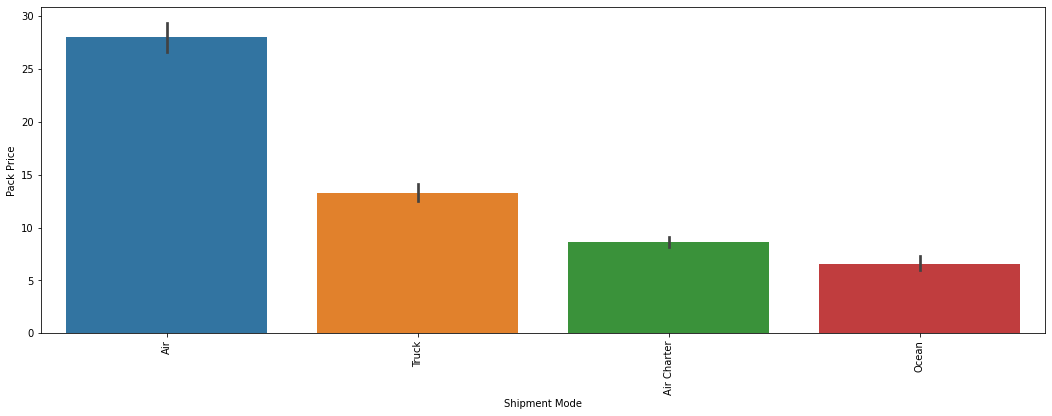

In [38]:
plt.subplots(figsize = (18,6))
plt.xticks(rotation = 90)
sns.barplot('Shipment Mode','Pack Price', data = df)
plt.show()